## Module Dependency

In [7]:
%matplotlib inline

import numpy as np
from skimage import io
from skimage.color import rgb2lab
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0)

## Read Image

Shape of Image: (405, 600, 3)


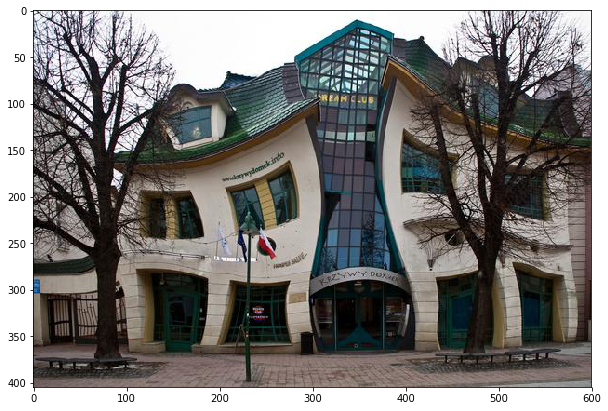

In [8]:
image = io.imread('./data/input1.jpg')
print('Shape of Image: {}'.format(image.shape))
plt.imshow(image)

---

## KMeans

### Generate features for clustering

In [9]:
image_height, image_width, _ = image.shape
idx = np.indices((image_height, image_width))
image_arr = np.zeros((image_height, image_width, 5))
image_arr[:, :, :3] = rgb2lab(image)
image_arr[:, :, -2] = idx[0]/image_height
image_arr[:, :, -1] = idx[1]/image_width
# image_arr[:, :, 0] /= image_arr[:, :, 0].max()
# image_arr[:, :, 1:2] = (image_arr[:, :, 1:2] - image_arr[:, :, 1:2].min()) / (image_arr[:, :, 1:2].max()-image_arr[:, :, 1:2].min())

In [10]:
image_arr = image_arr.reshape(-1, 5)
print('Image Arr Shape: {}'.format(image_arr.shape))

Image Arr Shape: (243000, 5)


### Implementation of KMeans Clustering

In [13]:
def distance(vector1, vector2):
    return np.sum(np.power(vector1 - vector2, 2))
def init_center(dataset, k):
    sample_size, dim = dataset.shape
    centers = np.zeros((k, dim))
    s = set()
    for i in range(k):
        while True:
            index = int(np.random.uniform(0, sample_size + 1))
            if index not in s:
                s.add(index)
                break
        centers[i, :] = dataset[index, :]
    return centers
def KMeans(dataset, k):
    sample_size = dataset.shape[0]
    cluster_mat = np.mat(np.zeros((sample_size, 2)))
    cluster_flag = True
    centers = init_center(dataset, k)
    i = 0
    while cluster_flag:
        cluster_flag = False
        for i in range(sample_size):
            min_dist = float('inf')
            min_idx = -1
            for j in range(k):
                dist = distance(centers[j, :], dataset[i, :])
                if dist < min_dist:
                    min_dist = dist
                    min_idx = j
            if cluster_mat[i, 0] != min_idx:
                cluster_flag = True
                cluster_mat[i, :] = min_idx, min_dist
        for j in range(k):
            cluster_points = dataset[np.nonzero(cluster_mat[:, 0].A == j)[0]]
            centers[j, :] = np.mean(cluster_points, axis=0)
        i = i+1
        if i == 1000:
            cluster_flag = False
    return centers, cluster_mat

### Run K=4

In [14]:
centers, labels = KMeans(image_arr, 4)
print(centers)
print(labels)

[[  6.41479199e+01   1.63195121e+00   3.52685172e+00   5.59201222e-01
    4.92043453e-01]
 [  9.54641100e+01   4.00985616e-01  -1.39767679e+00   1.07700851e-01
    4.36915288e-01]
 [  1.10035576e+01  -7.01517510e-02   1.53484173e+00   5.59807246e-01
    5.09695229e-01]
 [  3.65914594e+01   1.19864664e+00   2.00194438e+00   5.40421897e-01
    5.19059118e-01]]
[[   1.          766.30292514]
 [   1.          566.39834834]
 [   1.          174.47996121]
 ..., 
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]]


### Get all label for every pixel and reshape array

In [15]:
label_arr = labels[:, 0]
label_arr = label_arr.reshape(image_height, image_width)
label_arr.shape

(405, 600)

### Show each clustering

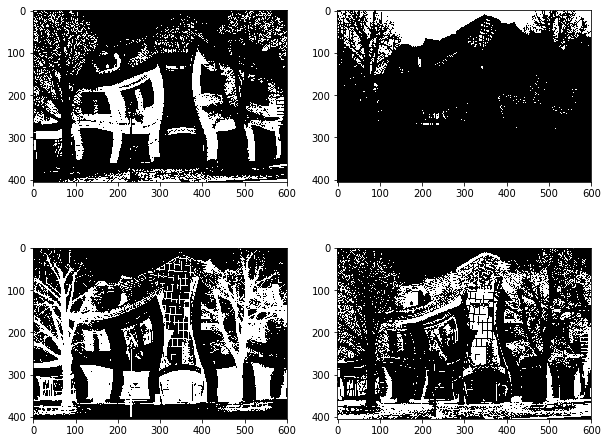

In [16]:
fig, axs = plt.subplots(2,2)
axs[0][0].imshow(label_arr == 0, cmap="gray")
axs[0][1].imshow(label_arr == 1, cmap="gray")
axs[1][0].imshow(label_arr == 2, cmap="gray")
axs[1][1].imshow(label_arr == 3, cmap="gray")

### Edge image

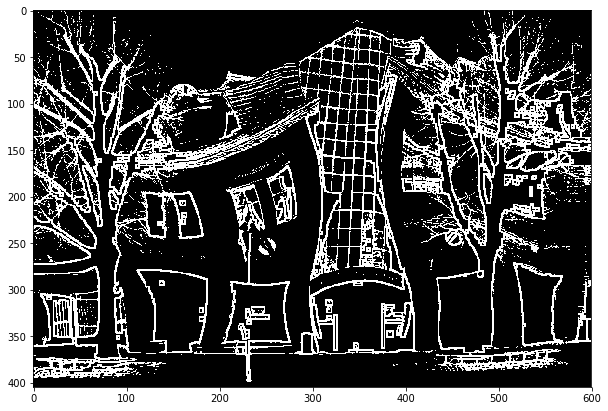

In [18]:
from skimage.morphology import erosion, square
image_kmeans_edge = np.array(label_arr == 2, dtype='uint8')
image_kmeans_edge = image_kmeans_edge - erosion(image_kmeans_edge, square(5))
plt.imshow(image_kmeans_edge, cmap="gray")

### Show result

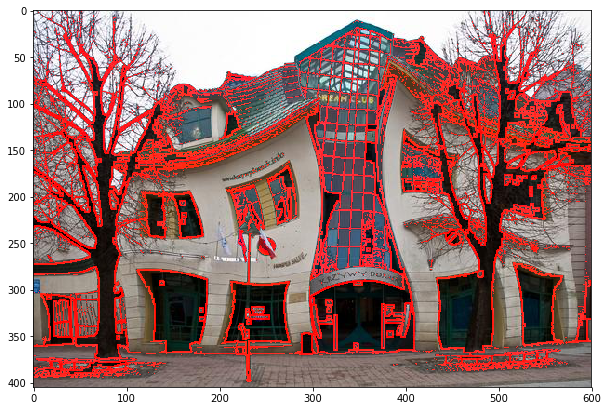

In [19]:
image_kmeans = image.copy()
red_channel = image_kmeans[:, :, 0]
red_channel[image_kmeans_edge == True] = 255
plt.imshow(image_kmeans)

### Save image

In [22]:
io.imsave('./data/output_kmeans.jpg', image_kmeans)

### This part is used to generate figure for report

In [20]:
centers_test, labels_test = KMeans(image_arr, 10)
print(centers_test)
print(labels_test)

[[  1.83559107e+01  -2.95712286e+00  -1.44223524e+00   4.64080597e-01
    5.40063443e-01]
 [  7.13709711e+01   1.05928268e+00   3.18120422e+00   5.31469872e-01
    5.07876886e-01]
 [  2.00916231e+01   4.92985541e+00   1.16882899e+01   5.39032908e-01
    5.47807167e-01]
 [  4.73464936e+01   3.49959675e+00   5.06828955e+00   6.96272870e-01
    5.09662587e-01]
 [  8.28356565e+01   1.12349417e+00  -3.53436552e+00   2.02923447e-01
    4.31022001e-01]
 [  5.89249351e+00   5.15414924e-01   1.20864805e+00   6.09742075e-01
    4.83211536e-01]
 [  3.53301131e+01  -3.03048677e+00  -8.48777458e+00   3.24316119e-01
    5.16538497e-01]
 [  9.82425654e+01   2.36522346e-01  -8.49335638e-01   8.75106036e-02
    4.38256587e-01]
 [  5.92879134e+01   1.53324546e+00   3.71793066e+00   5.60501838e-01
    4.75146282e-01]
 [  3.29179327e+01   2.40702549e+00   6.30963990e+00   6.12609345e-01
    5.24430288e-01]]
[[  7.           0.59013975]
 [  7.          31.38897673]
 [  4.          53.79868221]
 ..., 
 [  8

In [21]:
label_arr_test = labels_test[:, 0]
label_arr_test = label_arr_test.reshape(image_height, image_width)
label_arr_test.shape

(405, 600)

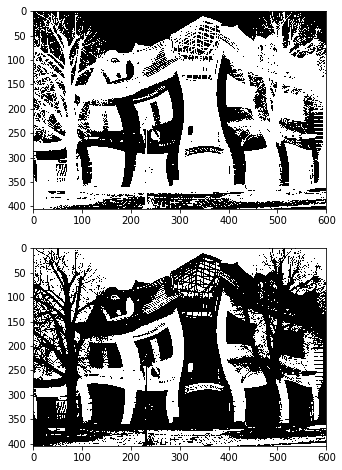

In [11]:
# fig, axs = plt.subplots(2)
# axs[0].imshow(label_arr_test == 0, cmap="gray")
# axs[1].imshow(label_arr_test == 1, cmap="gray")

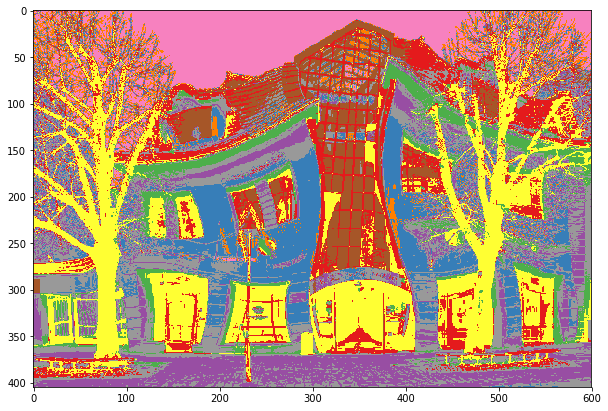

In [22]:
plt.imshow(label_arr_test, cmap="Set1")

---

## Canny Filter

### Convert image to gray

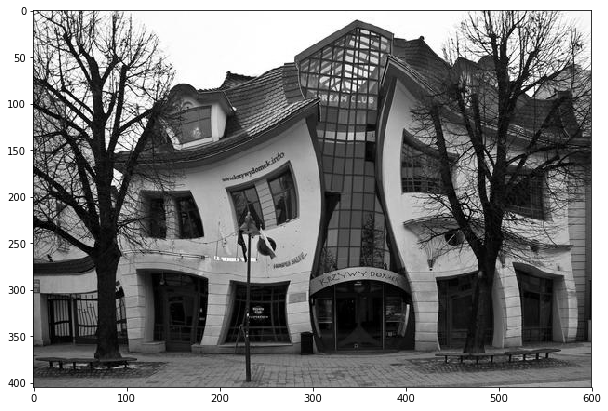

In [23]:
from skimage.color import rgb2gray
image_gray = rgb2gray(image)
plt.imshow(image_gray, cmap='gray')

### Canny filter and edge detection implementation

In [24]:
import scipy.ndimage as ndi
from skimage.util import dtype_limits
from scipy.ndimage import gaussian_filter, generate_binary_structure, binary_erosion, label

def ca1(image, sigma, low_threshold=None, high_threshold=None):
    if low_threshold is None:
        low_threshold = 0.1 * dtype_limits(image, clip_negative=False)[1]

    if high_threshold is None:
        high_threshold = 0.2 * dtype_limits(image, clip_negative=False)[1]

    smoothed = gaussian_filter(image, sigma=sigma, mode='constant')
    ysobel = ndi.sobel(smoothed, axis=1)
    xsobel = ndi.sobel(smoothed, axis=0)
    abs_xsobel = np.abs(xsobel)
    abs_ysobel = np.abs(ysobel)
    magnitude = np.hypot(xsobel, ysobel)
    
    # Create Eroded Mask
    mask = np.ones(image.shape, dtype=bool)
    s = generate_binary_structure(2, 2)
    eroded_mask = binary_erosion(mask, s, border_value=0)
    eroded_mask = eroded_mask & (magnitude > 0)
    
    # Find Local Maximum for every direction
    local_maxima = np.zeros(image.shape, bool)
    
    ## 0 to 45 degrees
    pts_plus = (xsobel >= 0) & (ysobel >= 0) & (abs_xsobel >= abs_ysobel)
    pts_minus = (xsobel <= 0) & (ysobel <= 0) & (abs_xsobel >= abs_ysobel)
    pts = pts_plus | pts_minus
    pts = eroded_mask & pts
    
    ### Shift Left magnitude matrix to get right point of current point,
    ### Use the same method the get other direction of this point
    c1 = magnitude[1:, :][pts[:-1, :]]
    c2 = magnitude[1:, 1:][pts[:-1, :-1]]
    m = magnitude[pts]
    w = abs_ysobel[pts] / abs_xsobel[pts]
    c_plus = c2 * w + c1 * (1 - w) <= m
    c1 = magnitude[:-1, :][pts[1:, :]]
    c2 = magnitude[:-1, :-1][pts[1:, 1:]]
    c_minus = c2 * w + c1 * (1 - w) <= m
    local_maxima[pts] = c_plus & c_minus
    
    ## 45 to 90 degree
    pts_plus = (xsobel >= 0) & (ysobel >= 0) & (abs_xsobel <= abs_ysobel)
    pts_minus = (xsobel <= 0) & (ysobel <= 0) & (abs_xsobel <= abs_ysobel)
    pts = pts_plus | pts_minus
    pts = eroded_mask & pts
    c1 = magnitude[:, 1:][pts[:, :-1]]
    c2 = magnitude[1:, 1:][pts[:-1, :-1]]
    m = magnitude[pts]
    w = abs_xsobel[pts] / abs_ysobel[pts]
    c_plus = c2 * w + c1 * (1 - w) <= m
    c1 = magnitude[:, :-1][pts[:, 1:]]
    c2 = magnitude[:-1, :-1][pts[1:, 1:]]
    c_minus = c2 * w + c1 * (1 - w) <= m
    local_maxima[pts] = c_plus & c_minus
    
    ## 90 to 135 degree
    pts_plus = (xsobel <= 0) & (ysobel >= 0) & (abs_xsobel <= abs_ysobel)
    pts_minus = (xsobel >= 0) & (ysobel <= 0) & (abs_xsobel <= abs_ysobel)
    pts = pts_plus | pts_minus
    pts = eroded_mask & pts
    c1a = magnitude[:, 1:][pts[:, :-1]]
    c2a = magnitude[:-1, 1:][pts[1:, :-1]]
    m = magnitude[pts]
    w = abs_xsobel[pts] / abs_ysobel[pts]
    c_plus = c2a * w + c1a * (1.0 - w) <= m
    c1 = magnitude[:, :-1][pts[:, 1:]]
    c2 = magnitude[1:, :-1][pts[:-1, 1:]]
    c_minus = c2 * w + c1 * (1.0 - w) <= m
    local_maxima[pts] = c_plus & c_minus

    ## 135 to 180 degree
    pts_plus = (xsobel <= 0) & (ysobel >= 0) & (abs_xsobel >= abs_ysobel)
    pts_minus = (xsobel >= 0) & (ysobel <= 0) & (abs_xsobel >= abs_ysobel)
    pts = pts_plus | pts_minus
    pts = eroded_mask & pts
    c1 = magnitude[:-1, :][pts[1:, :]]
    c2 = magnitude[:-1, 1:][pts[1:, :-1]]
    m = magnitude[pts]
    w = abs_ysobel[pts] / abs_xsobel[pts]
    c_plus = c2 * w + c1 * (1 - w) <= m
    c1 = magnitude[1:, :][pts[:-1, :]]
    c2 = magnitude[1:, :-1][pts[:-1, 1:]]
    c_minus = c2 * w + c1 * (1 - w) <= m
    local_maxima[pts] = c_plus & c_minus

    
    # Create two masks for two thresholds
    high_mask = local_maxima & (magnitude >= high_threshold)
    low_mask = local_maxima & (magnitude >= low_threshold)
    
    label_arr, count = label(low_mask, np.ones((3, 3), bool))
    if count == 0:
        return low_mask

    sums = np.array(ndi.sum(high_mask, label_arr, np.arange(count, dtype=np.int32) + 1), copy=False, ndmin=1)
    good_label = np.zeros((count + 1,), bool)
    good_label[1:] = sums > 0
    output_mask = good_label[label_arr]
    return output_mask

### Use canny filter to generate edges

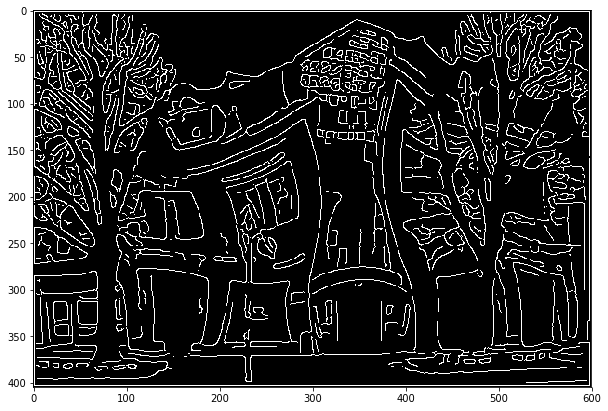

In [25]:
image_edge = ca1(image_gray, sigma=2)
plt.imshow(image_edge, cmap='gray')

### Show result

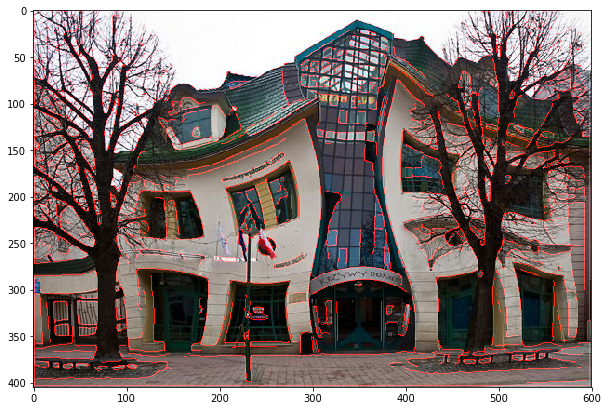

In [26]:
image_canny = image.copy()
red_channel = image_canny[:, :, 0]
red_channel[image_edge == True] = 255
plt.imshow(image_canny)

### Save image

In [27]:
io.imsave('./data/output_canny.jpg', image_canny)

---

## Threshold Based Method

## Entire Image

### Convert image to gray

In [28]:
image_gray = rgb2gray(image)
image_gray

array([[ 0.99636118,  0.93951686,  0.80226196, ...,  0.97254902,
         0.97254902,  0.97254902],
       [ 0.91598745,  0.89637961,  0.94736   , ...,  0.97254902,
         0.97254902,  0.97254902],
       [ 0.92383059,  0.99636118,  0.95520314, ...,  0.97254902,
         0.97254902,  0.97254902],
       ..., 
       [ 0.36824667,  0.35648196,  0.35256039, ...,  0.56443804,
         0.56443804,  0.56443804],
       [ 0.40354078,  0.38785451,  0.3760898 , ...,  0.52914392,
         0.53306549,  0.53698706],
       [ 0.41530549,  0.39961922,  0.37216824, ...,  0.50953608,
         0.50953608,  0.51345765]])

### Perform threshold based algorithm

0.46934995107608668

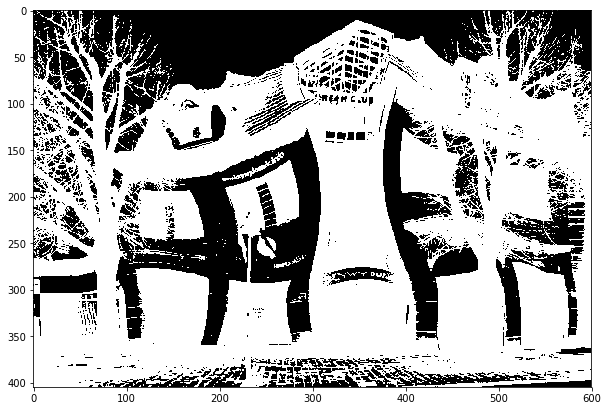

In [29]:
T = 0.5
flag = True
image_threshlod = image_gray.copy()
# group1 = np.zeros(image_gray.shape)
# group2 = np.zeros(image_gray.shape)
while flag:
    group1 = image_gray[image_gray >= T]
#     print(image_gray.shape)
#     print(group1.shape)
    group2 = image_gray[image_gray < T]
    new_T = 0.5 * (group1.mean() + group2.mean())
#     print(new_T)
#     print(T)
#     print(abs(new_T - T))
    if np.abs(new_T - T) <= 0.001:
        T = new_T
        flag = False
    T = new_T
image_threshlod[image_threshlod < T] = 0
image_threshlod[image_threshlod >= T] = 1
image_threshlod = np.logical_not(image_threshlod)
plt.imshow(image_threshlod, cmap='gray')
T

### Generate edge

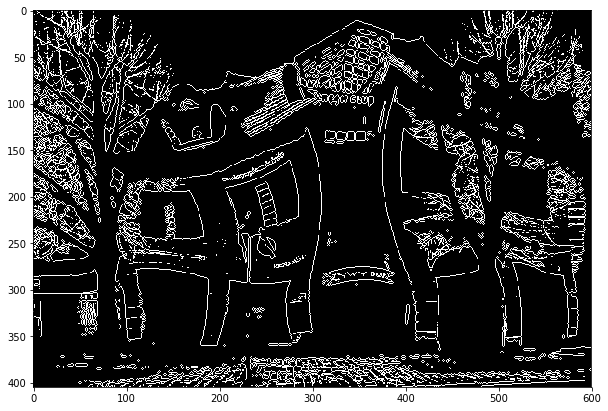

In [30]:
from skimage.morphology import erosion
image_threshlod_edge = np.array(image_threshlod == 1, dtype='uint8')
image_threshlod_edge = image_threshlod_edge - erosion(image_threshlod_edge)
plt.imshow(image_threshlod_edge, cmap="gray")

### Show result

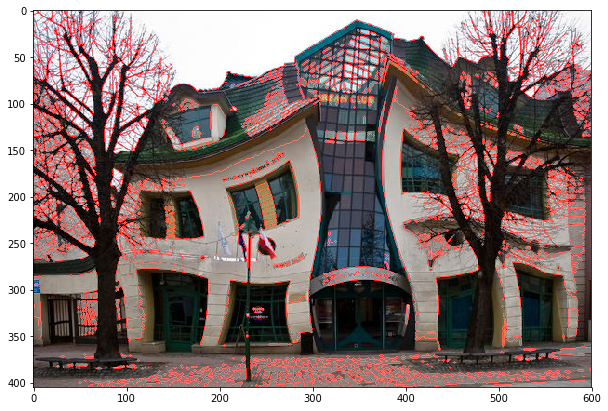

In [31]:
image_threshlod = image.copy()
red_channel = image_threshlod[:, :, 0]
red_channel[image_threshlod_edge == True] = 255
plt.imshow(image_threshlod)

### Save image

In [32]:
io.imsave('./data/output_threshold_global.jpg', image_threshlod)

---
## Several parts of image

### Threshold algorithm

In [33]:
def find_threshold(image):
    T = 0.5
    flag = True
    while flag:
        group1 = image[image >= T]
        group2 = image[image < T]
        new_T = 0.5 * (group1.mean() + group2.mean())
        if np.abs(new_T - T) <= 0.001:
            T = new_T
            flag = False
        T = new_T
    return T

### Split image into four parts

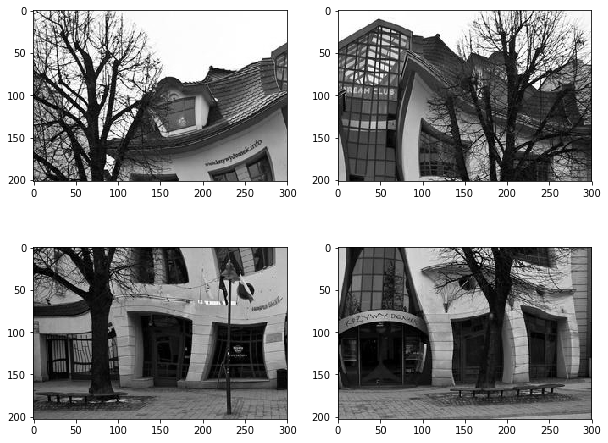

In [34]:
image_local = image_gray.copy()
h, w = image_gray.shape
image_local_1 = image_local[:int(0.5*h), :int(0.5*w)]
image_local_2 = image_local[:int(0.5*h), int(0.5*w):]
image_local_3 = image_local[int(0.5*h):, :int(0.5*w)]
image_local_4 = image_local[int(0.5*h):, int(0.5*w):]
fig, axs = plt.subplots(2,2)
axs[0][0].imshow(image_local_1, cmap='gray')
axs[0][1].imshow(image_local_2, cmap='gray')
axs[1][0].imshow(image_local_3, cmap='gray')
axs[1][1].imshow(image_local_4, cmap='gray')

### Perform threshold based method on each part

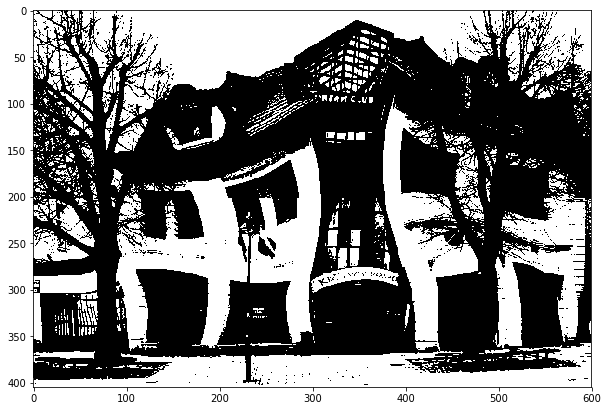

In [35]:
t1 = find_threshold(image_local_1)
image_local_1[image_local_1 < t1] = 0
image_local_1[image_local_1 >= t1] = 1
# image_local_1 = np.logical_not(image_local_1)

t2 = find_threshold(image_local_2)
image_local_2[image_local_2 < t2] = 0
image_local_2[image_local_2 >= t2] = 1
# image_local_2 = np.logical_not(image_local_2)

t3 = find_threshold(image_local_3)
image_local_3[image_local_3 < t3] = 0
image_local_3[image_local_3 >= t3] = 1
# image_local_3 = np.logical_not(image_local_3)

t4 = find_threshold(image_local_4)
image_local_4[image_local_4 < t4] = 0
image_local_4[image_local_4 >= t4] = 1
# image_local_4 = np.logical_not(image_local_4)

plt.imshow(image_local, cmap='gray')

### Generate edge

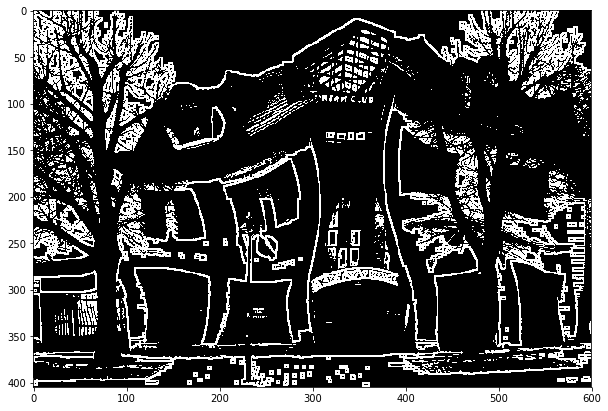

In [36]:
image_local_edge = np.array(image_local == 1, dtype='uint8')
image_local_edge = image_local_edge - erosion(image_local_edge, square(5))
plt.imshow(image_local_edge, cmap="gray")

### Show result

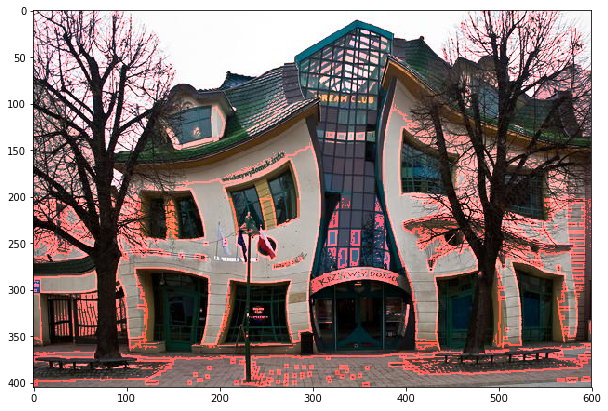

In [37]:
image_local = image.copy()
red_channel = image_local[:, :, 0]
red_channel[image_local_edge == True] = 255
plt.imshow(image_local)

### Save image

In [39]:
io.imsave('./data/output_threshold_local.jpg', image_local)